# 過学習の問題

Rの関数nlsを使うとデータを適切に表現する曲線を当てはめる（フィッティングを行う）ことができる．
「適切」が何を表すかは，利用者が目的に応じて定めたモデルにもとづく．
回帰直線は，データが直線により表現されるというモデルに当てはめるのであり，そのために最小二乗法という手法が使われている．
最小二乗法の理解は，多変数の微積分の知識があればやさしいが，ここでは説明しない．

ここでは中井悦司『エンジニアのための機械学習理論入門』にある例題を参考に，フィッティングに伴う過学習の問題を説明する．

最初に正弦関数の点をプロットする．
関数curveは与えた式の曲線を描く．
２つのグラフ要素を１つの図に重ねて表示するためのRの命令がparである．
オプションxlim, ylimはグラフの描画範囲を指定している．
その他のオプション指定は２つのグラフを重ねて描くときに見苦しい要素を消すための指定なので，無視してよい．





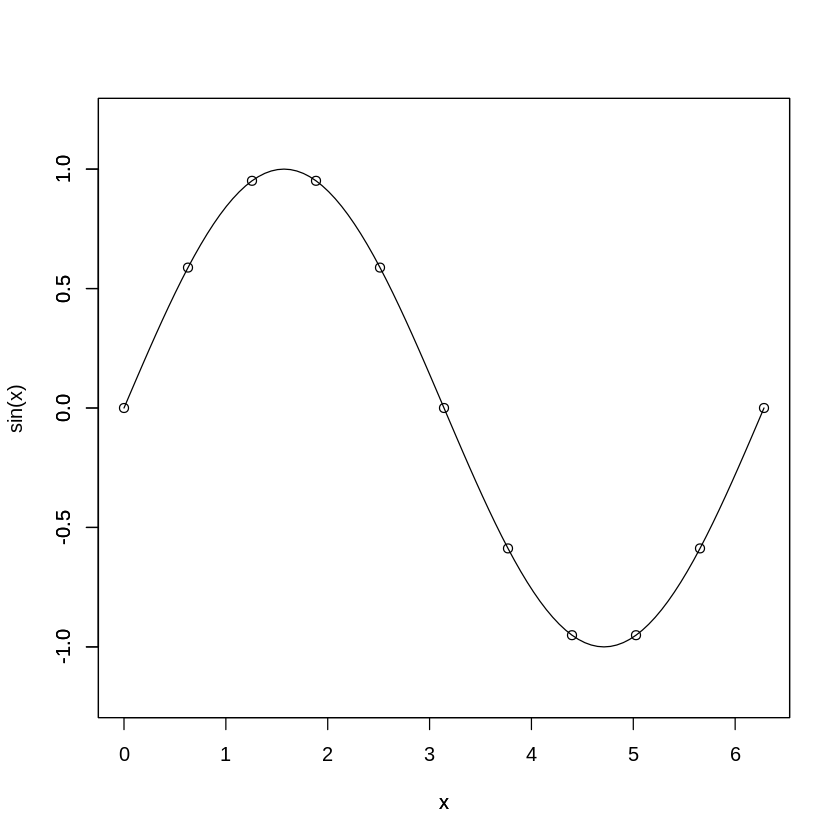

In [1]:
x=-0:10
plot(x,sin(2*pi*x/10),ylim=c(-1.2,1.2),ylab="",xaxt="n")
par(new=T)
curve(sin(x),xlim=c(0,2*pi),ylim=c(-1.2,1.2))

正弦曲線の上に○がいくつか乗っている．
次のグラフでは，この○を上下に乱数（Rの関数runifで乱数を生成した）でずらしたものである．

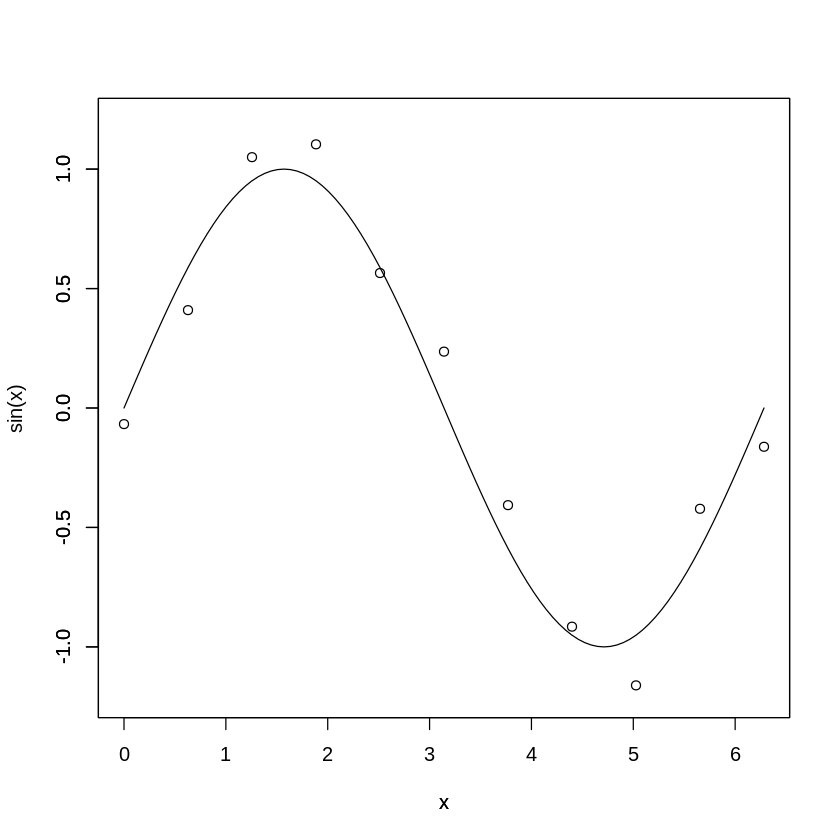

In [2]:
x=-0:10
plot(x,sin(2*pi*x/10)+(runif(11)-0.5)/2,ylim=c(-1.2,1.2),ylab="",xaxt="n")
par(new=T)
curve(sin(x),xlim=c(0,2*pi),ylim=c(-1.2,1.2))

乱数は実行の度に値が変わってしまう．
次にしたいことは，この正弦曲線からずれのある点全体を通る曲線を描くことである．
このため乱数の値を変数dekobokoに保存して再利用できるようにした．
それをもとに正弦曲線からずれた点全体を通る折れ線を描いてみた．

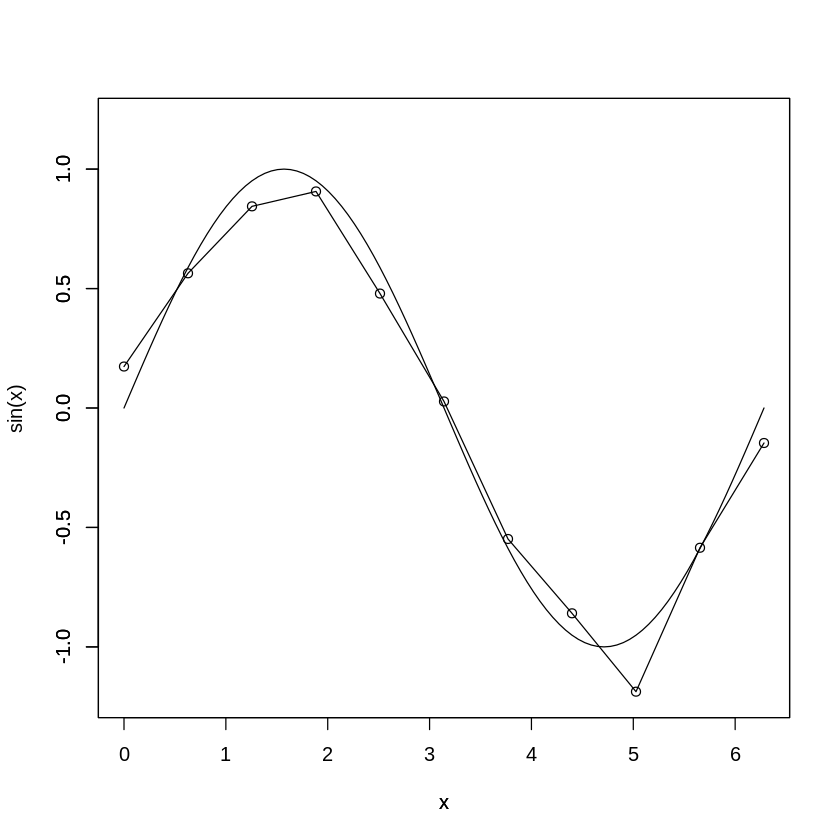

In [3]:
x=-0:10
dekoboko<-sin(2*pi*x/10)+(runif(11)-0.5)/2
plot(x,dekoboko,ylim=c(-1.2,1.2),ylab="",xaxt="n",type='o')
par(new=T)
curve(sin(x),xlim=c(0,2*pi),ylim=c(-1.2,1.2))

次に試みることは，折れ線ではなく，直線，２次曲線，３次曲線と順に字数を増やした曲線を，正弦曲線からずらして作った点全体に当てはめることである．
ある次数まではすべての点を通ることはない．
これが当てはめることと通ることの違いでもある．

---



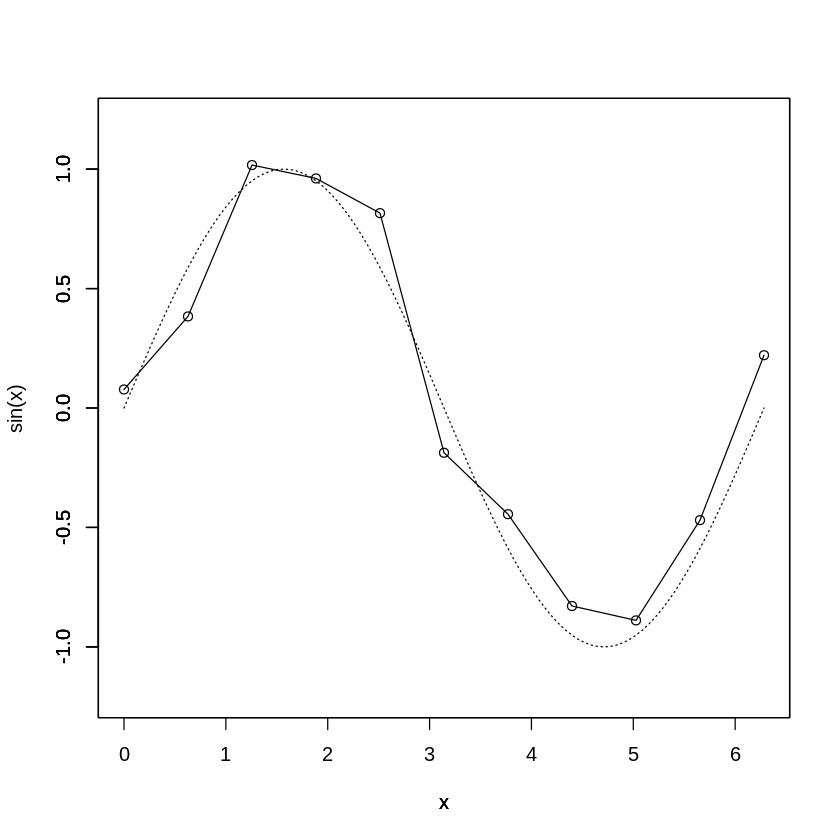

In [8]:
x<-0:10
dekoboko<-sin(2*pi*x/10)+(runif(11)-0.5)/2
deko<-data.frame(x,dekoboko)
plot(x,dekoboko,ylim=c(-1.2,1.2),ylab="",xaxt="n")
# フィッティングを行う関数がlm
# degreeに多項式の次数を設定
# 描かせたい多項式の次数をコメント行でなくして実行してみよう
# 点の個数が11点なので10次多項式だとすべての点を通る
#
# f1<-lm(dekoboko~poly(x,degree=1))
# f1<-lm(dekoboko~poly(x,degree=2))
f1<-lm(dekoboko~poly(x,degree=3))
# f1<-lm(dekoboko~poly(x,degree=6))
# f1<-lm(dekoboko~poly(x,degree=10))
# 求めた多項式のグラフを描くための点の準備
# 関数predictはlm関数で与えた数式上の各点のy座標を与える
f1curve<-predict(f1)
par(new=T)
# 参考とするもとの正弦曲線は点線で表示
curve(sin(x),xlim=c(0,2*pi),ylim=c(-1.2,1.2),lty="dotted")
# 多項式を表す曲線はRの関数では折れ線に描く
par(new=T)
plot(x,f1curve,ylim=c(-1.2,1.2),type="l",ylab="",xaxt="n")

すべての点を通る場合を描かせた結果はどう見えただろうか．
良い結果に思えただろうか．
少なくとももとの正弦関数と重なっていないことは明らかである．
データに合わせ過ぎると，かえって予測能力がなくなる状況を過学習という．
人工知能技術による予測では避けるべきことである．